In [52]:
#IMPORTAMOS LO NECESARIO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

## Resumen de mi analisis de datos y un 'merge manual' con algunas cosas de Braian.

In [18]:
#CARGAMOS LAS VARIABLES EN UN DF
df = pd.read_csv("C:/Users/Fran/Desktop/Facultad/Orga/tp3/Org-Datos-Grupo-19/train_data_final.csv")


#VERIFICO QUE SE HAYA CARGADO BIEN
df.tail()

,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
276567,873580,288144823325d823e5f8a47dda65d2e0ed09a9f78bebcb...,2017-03-10,0.193743,0.533914,0.140841,0.126221,0.500161,0.158571,0.165877,...,NaN,NaN,1.008759,0.009847,0.979542,0.735387,1.000480,0.150231,0.276447,1
276568,262686,0c3757cb750959c88f6edf19609e7195ca8ff2b6f72a30...,2017-09-29,0.402107,0.914917,0.442733,0.000432,0.003491,NaN,0.436728,...,NaN,NaN,0.000951,0.006729,0.005159,NaN,0.007615,0.008715,0.005995,0
276569,5441718,fbd8d187c9f8a05016512f66707160b600434293b06ecf...,2017-09-23,0.841845,0.004404,0.010854,1.001861,0.004759,0.163909,0.007592,...,NaN,NaN,0.003941,0.007252,0.006897,NaN,0.008909,0.000816,0.006528,0
276570,2296570,6a1c7ee2ef483998bd91b42107b18b84ab3012f57e9f81...,2017-04-30,0.393324,0.117837,0.205245,0.015611,0.004225,0.564817,0.008934,...,NaN,NaN,0.008293,0.000285,0.009883,NaN,0.008599,0.004125,0.009582,1
276571,868216,28414f3556fae6250e04f6d0523d68f3a87fafa1e12c15...,2017-03-03,0.281986,0.000776,0.126253,0.157348,0.509473,0.267404,0.001177,...,NaN,NaN,0.005667,0.002016,0.002501,NaN,0.009089,0.008158,0.000012,1


Todo lo que es principios no esta, esta la parte de nulls y outliers. Este ultimo con z-score

In [19]:
cantidad_nulos = df.isnull().sum()
porcentaje_nulos = round(cantidad_nulos/len(df)*100,2)


#Creo un dataframe aparte con los nulos y sus porcentajes.Si son mayores a 70, como grupo decidimos que se borra la columna.
total_nulos = pd.DataFrame(cantidad_nulos,columns=["Cantidad de Nulos"])
total_nulos['Porcentaje Nulos']=porcentaje_nulos


#Donde 1=True, 0=False
total_nulos['Porcentaje de nulos'] = np.where(total_nulos['Porcentaje Nulos']>45,'Mayores a 45%',
    'Menores o iguales a 45%')

total_nulos

,Cantidad de Nulos,Porcentaje Nulos,Porcentaje de nulos
Unnamed: 0,0,0.00,Menores o iguales a 45%
customer_ID,0,0.00,Menores o iguales a 45%
S_2,0,0.00,Menores o iguales a 45%
P_2,2295,0.83,Menores o iguales a 45%
D_39,0,0.00,Menores o iguales a 45%
...,...,...,...
D_142,229717,83.06,Mayores a 45%
D_143,5139,1.86,Menores o iguales a 45%
D_144,2049,0.74,Menores o iguales a 45%
D_145,5139,1.86,Menores o iguales a 45%


###  Grafico de los porcentajes de nulos por columnas

Text(0.5, 0, 'Cantidad de Columnas')

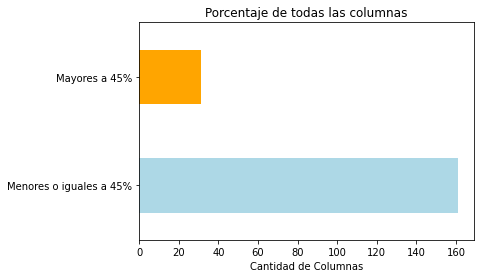

In [20]:
total_nulos['Porcentaje de nulos'].value_counts().plot.barh(color=['lightblue','orange'])
plt.title("Porcentaje de todas las columnas")
plt.xlabel('Cantidad de Columnas')

Agrego la parte de Braian donde borra las columnas. Iba a hacerlo de vuelta, pero si uso lo mismo es mas facil unirlo despues.

In [21]:
#Funcion que elimina columnas segun el porcentaje de nulos que tengan

def rmissingvaluecol(dataframe, porcentaje):
    l = []
    l = list(dataframe.drop(dataframe.loc[:,list((100*(dataframe.isnull().sum()/len(dataframe.index)) >= porcentaje))].columns, 1).columns.values)
    print("# Columns having more than %s percent missing values: "%porcentaje, (dataframe.shape[1] - len(l)))
    print("Columns:\n", list(set(list((dataframe.columns.values))) - set(l)))
    return l

In [22]:
filtrar_columnas = rmissingvaluecol(df,45)

df_filtrado = df[filtrar_columnas]

df_filtrado.shape

# Columns having more than 45 percent missing values:  31
Columns:
 ['D_50', 'D_76', 'B_39', 'D_135', 'D_137', 'D_42', 'R_9', 'D_105', 'D_110', 'D_53', 'D_82', 'D_136', 'D_73', 'D_77', 'D_134', 'B_17', 'D_132', 'D_87', 'D_108', 'D_56', 'D_106', 'D_111', 'D_138', 'R_26', 'B_29', 'B_42', 'D_49', 'S_9', 'D_142', 'D_88', 'D_66']


(276572, 161)

Borrado de las correlativas

In [23]:
corr = df_filtrado.drop(['target', 'Unnamed: 0'], axis=1).corr()
correlated_features = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.7:
            colname = corr.columns[i]
            correlated_features.add(colname)
correlated_features.update(['Unnamed: 0'])
corr = df_filtrado.drop(correlated_features, axis = 1).corr()


df_reducido = df_filtrado.loc[:,list(corr.columns)]




In [24]:
columnas_categoricas = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
columnas_cuantitativas = []
for columna in df_reducido.columns:
    if columna not in columnas_categoricas:
        columnas_cuantitativas.append(columna)
df_cuantitativas = df_reducido[columnas_cuantitativas].copy()

df_cuantitativas.shape

(276572, 109)

Rellenando 'Nans' para variables numericas con su media

In [25]:
from sklearn.impute import SimpleImputer
columnas = df_cuantitativas.columns
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp.fit(df_cuantitativas)
df_sin_null = pd.DataFrame(imp.transform(df_cuantitativas), columns=columnas)
#df_sin_null.drop('P_2')

#### Ya teniendo el df necesario para el z-score, vemos outliers.

*Ahora que eliminamos los nulos queda trabajar con los outliers.
Evaluamos la posibilidad de que todos los valores restantes del dataframe esten entre 0 y 1 pero cuando haces un df.sample ya ves que algunos casos no
por lo que descartamos esa idea.*

Proseguimos viendo un caso de ejemplo para ver Outliers.

El valor maximo de la columna es:  4.81966993844126
El valor minimo de la columna es:  1.2950453317506216e-08
La cantidad de valores mayores a 3 son:  16


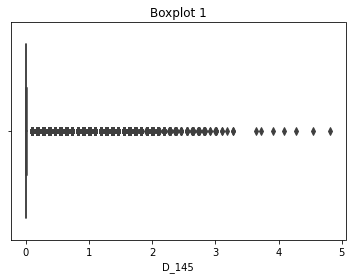

In [26]:
#Usando como ejemplo la columna D_145
#Busco los valores maximos y minimos de otro ejemplo
print("El valor maximo de la columna es: ",df_filtrado['D_145'].max())
print("El valor minimo de la columna es: ",df_filtrado['D_145'].min())

d_145=df_filtrado['D_145']
sns.boxplot(d_145).set(title='Boxplot 1')
print("La cantidad de valores mayores a 3 son: ",(d_145[d_145>3]).count())


#En este caso lo logico seria borrar esos 16 valores ya que son considerados outliers.

[Text(0.5, 1.0, 'Boxplot 2')]

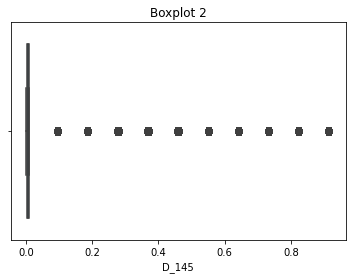

In [27]:
#Le hago 'zoom' a la parte entre 0 y 1 para que se vea mejor el boxplot
sns.boxplot(d_145[d_145<1]).set(title='Boxplot 2')

#Volvemos a ver que la gran concentracion de datos esta entre valores muy cercanos a 0 y luego pega saltos de aproximadamente 0.1

[Text(0.5, 1.0, 'Boxplot 3')]

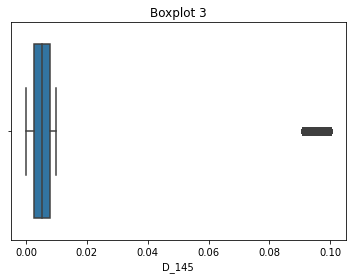

In [28]:
#Por ultimo grafico la misma columna para valores muy cercanos a 0
sns.boxplot(d_145[d_145<.1]).set(title='Boxplot 3')

Usando como ejemplo la columna D_145, vemos que segun el boxplot 3, se podrian 'considerar outliers' todos los valores que sean mayores a 0.02 pero como
esta cantidad en proporcion a los datos es grande, decidimos no eliminar dichos valores. Aunque si podria ser de eliminar los 16 valores mayores a 3 del
boxplot 1.

### Empiezo a utilizar z-score

Comenzamos usando como ejemplo a la misma columna D_145 para evaluar el z-score de la columna

,D_145,Z-Score,Cumple?,Finalizado
0,0.002719,-3.093681e-01,True,0.002719
1,0.095926,1.842965e-01,True,0.095926
2,0.061130,-3.675140e-17,True,0.061130
3,0.002798,-3.089509e-01,True,0.002798
4,0.000342,-3.219595e-01,True,0.000342
...,...,...,...,...
276567,0.276447,1.140413e+00,True,0.276447
276568,0.005995,-2.920201e-01,True,0.005995
276569,0.006528,-2.891979e-01,True,0.006528
276570,0.009582,-2.730215e-01,True,0.009582


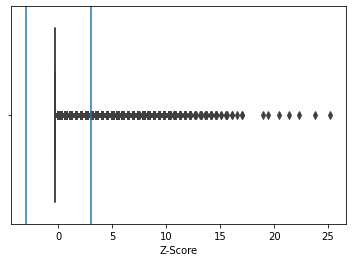

In [29]:
df_xd = pd.DataFrame(df_sin_null['D_145'])
df_xd['Z-Score'] = stats.zscore(df_sin_null['D_145'])
df_xd['Cumple?'] = np.where( (-3< df_xd['Z-Score']) & (df_xd['Z-Score']<3),True,False)

#Relaciona la primera y tercer columna para crear una cuarta con valores originales cuando Cumple = True y nan si cumple igual = False
#df_xd['Finalizado'] = [ele if stats.zscore(ele) <= 3 else np.nan() for ele in df_xd['D_145']]
#df_xd['Finalizado'] = df_xd['D_145'].loc[abs(df_xd['Z-Score']) > 3] = np.nan()
df_xd['Finalizado']= df_xd['D_145'].loc[abs(stats.zscore(df_xd['D_145'])) <= 3] 

display(df_xd)

sns.boxplot(df_xd['Z-Score'])
plt.axvline(3, 0)
plt.axvline(-3, 0)

#Donde para esta columna, consideramos outliers a todos los valores que tengan un | z_score | <=3


### Llevando lo anterior a todo el dataframe

In [30]:

def eliminar_por_zscore(df):
    result = pd.DataFrame()
    for col in df:    
        result[col] = df[col].loc[abs(stats.zscore(df[col])) <= 3] 
    return result
    



In [31]:
df_zscore = eliminar_por_zscore(df_sin_null)
df_zscore.isnull().sum()

#Evito que me muestre los warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

df_zscore=df_zscore.dropna()
display(df_zscore.shape)

#Tenemos el dataframe final sin outliers ni nulls. Me fijo la diferencia entre la cantidad de filas

print("Fueron eliminadas: ",df_sin_null.shape[0] - df_zscore.shape[0],"filas")




(113896, 109)

Fueron eliminadas:  162676 filas


### One hot encoding

Estoy usando el df original, sin modificaciones de outliers ni nans.

In [42]:
df_cat = df[columnas_categoricas]
display(df_cat.isna().sum())
df_cat['D_66'] = 1-df_cat['D_66'].isna().astype(int)
display(df_cat['D_66'].value_counts())

df_cat.shape

#En la columna D_66 reemplaza por 0 si no tiene info, 1 eoc

B_30         96
B_38         96
D_114      8928
D_116      8928
D_117      8928
D_120      8928
D_126      5927
D_63          0
D_64      11049
D_66     245464
D_68      10984
dtype: int64

0    245464
1     31108
Name: D_66, dtype: int64

(276572, 11)

In [50]:
for columna in df_cat:
    display(df[columna].value_counts())
    


0.0    235265
1.0     38480
2.0      2731
Name: B_30, dtype: int64

2.0    97555
3.0    62724
1.0    57955
5.0    22137
4.0    14769
7.0    13097
6.0     8239
Name: B_38, dtype: int64

1.0    165566
0.0    102078
Name: D_114, dtype: int64

0.0    267288
1.0       356
Name: D_116, dtype: int64

-1.0    72562
 3.0    58465
 4.0    56895
 2.0    33344
 5.0    22940
 6.0    17227
 1.0     6211
Name: D_117, dtype: int64

0.0    236870
1.0     30774
Name: D_120, dtype: int64

 1.0    213132
 0.0     44292
-1.0     13221
Name: D_126, dtype: int64

CO    205794
CR     46609
CL     22019
XZ      1328
XM       530
XL       292
Name: D_63, dtype: int64

O     145706
U      76180
R      41794
-1      1843
Name: D_64, dtype: int64

1.0    30809
0.0      299
Name: D_66, dtype: int64

6.0    139326
5.0     60126
3.0     24113
4.0     23718
2.0     11032
1.0      6468
0.0       805
Name: D_68, dtype: int64

In [48]:
display(df_cat['D_64'].value_counts())
df_cat['D_64'].info



O     145706
U      76180
R      41794
-1      1843
Name: D_64, dtype: int64

<bound method Series.info of 0           O
1           O
2         NaN
3           R
4           O
         ... 
276567      U
276568      R
276569      O
276570    NaN
276571      R
Name: D_64, Length: 276572, dtype: object>

### Codigo del one hot encoding

In [80]:
to_enc = columnas_categoricas
enc = OneHotEncoder()
enc.fit(df_cat[to_enc])
ohed = pd.DataFrame(enc.transform(df_cat[to_enc]).toarray())
print(f"Shape: {ohed.shape}")
print(f"Size: {ohed.size}")

ohed.columns = [name+"_"+str(y) for name,categorie in zip(enc.feature_names_in_,enc.categories_) for y in categorie]
display(ohed)






Shape: (276572, 54)
Size: 14934888


,B_30_0.0,B_30_1.0,B_30_2.0,B_30_nan,B_38_1.0,B_38_2.0,B_38_3.0,B_38_4.0,B_38_5.0,B_38_6.0,...,D_66_0,D_66_1,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0,D_68_nan
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276567,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276568,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
276569,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
276570,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [90]:
df_sin_na_categoricas = df.drop(columnas_categoricas,axis=1)

df_concat = pd.concat([df_sin_na_categoricas,ohed],axis=1)

display(df_concat)


,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_66_0,D_66_1,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0,D_68_nan
0,2518955,743d55408505dee752adc6e62b273f4397db6e89f19034...,2017-08-10,0.947242,0.002204,0.008002,1.007516,0.002830,0.453227,0.005992,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1781039,522c85a354bfec790067b54e9db7353d20d4709ae5dc93...,2017-07-04,0.757648,0.002076,0.008751,0.814083,0.000408,0.155700,0.004156,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1488700,4488928018c20bf6261e69c8a94a47b6206a2fe91480b8...,2017-07-29,0.392041,0.005770,0.029682,0.810262,0.006672,0.180378,0.005028,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3174307,9296e983c3e4f99b046952397fc4ba950abf1032a9bd6c...,2017-03-30,0.673978,0.588604,0.295201,0.024650,0.007951,0.125583,0.008760,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1379981,3fa10314686e0e51d8f76235eceab91d70aa3f24a98c3e...,2018-01-17,0.778075,0.006930,0.056721,0.819369,0.004922,0.089214,0.006884,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276567,873580,288144823325d823e5f8a47dda65d2e0ed09a9f78bebcb...,2017-03-10,0.193743,0.533914,0.140841,0.126221,0.500161,0.158571,0.165877,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276568,262686,0c3757cb750959c88f6edf19609e7195ca8ff2b6f72a30...,2017-09-29,0.402107,0.914917,0.442733,0.000432,0.003491,NaN,0.436728,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
276569,5441718,fbd8d187c9f8a05016512f66707160b600434293b06ecf...,2017-09-23,0.841845,0.004404,0.010854,1.001861,0.004759,0.163909,0.007592,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
276570,2296570,6a1c7ee2ef483998bd91b42107b18b84ab3012f57e9f81...,2017-04-30,0.393324,0.117837,0.205245,0.015611,0.004225,0.564817,0.008934,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
